In [885]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [886]:
#Loading the data
data0 = pd.read_csv('urldata13k.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,correios.com.br,0,0,1,4,0,0,0,0,0,0,1,1,0,0,1,0,0
1,caixa.gov.br,0,0,1,6,0,0,0,0,0,0,1,1,0,0,1,0,0
2,olx.ua,0,0,1,4,0,0,0,0,0,0,1,1,0,0,1,1,0
3,emgn.com,0,0,1,2,0,0,0,0,0,1,0,1,1,1,1,1,0
4,metro.co.uk,0,0,1,4,0,0,0,0,0,0,0,1,0,0,1,0,0


In [887]:
data0.shape

(12305, 18)

In [888]:
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

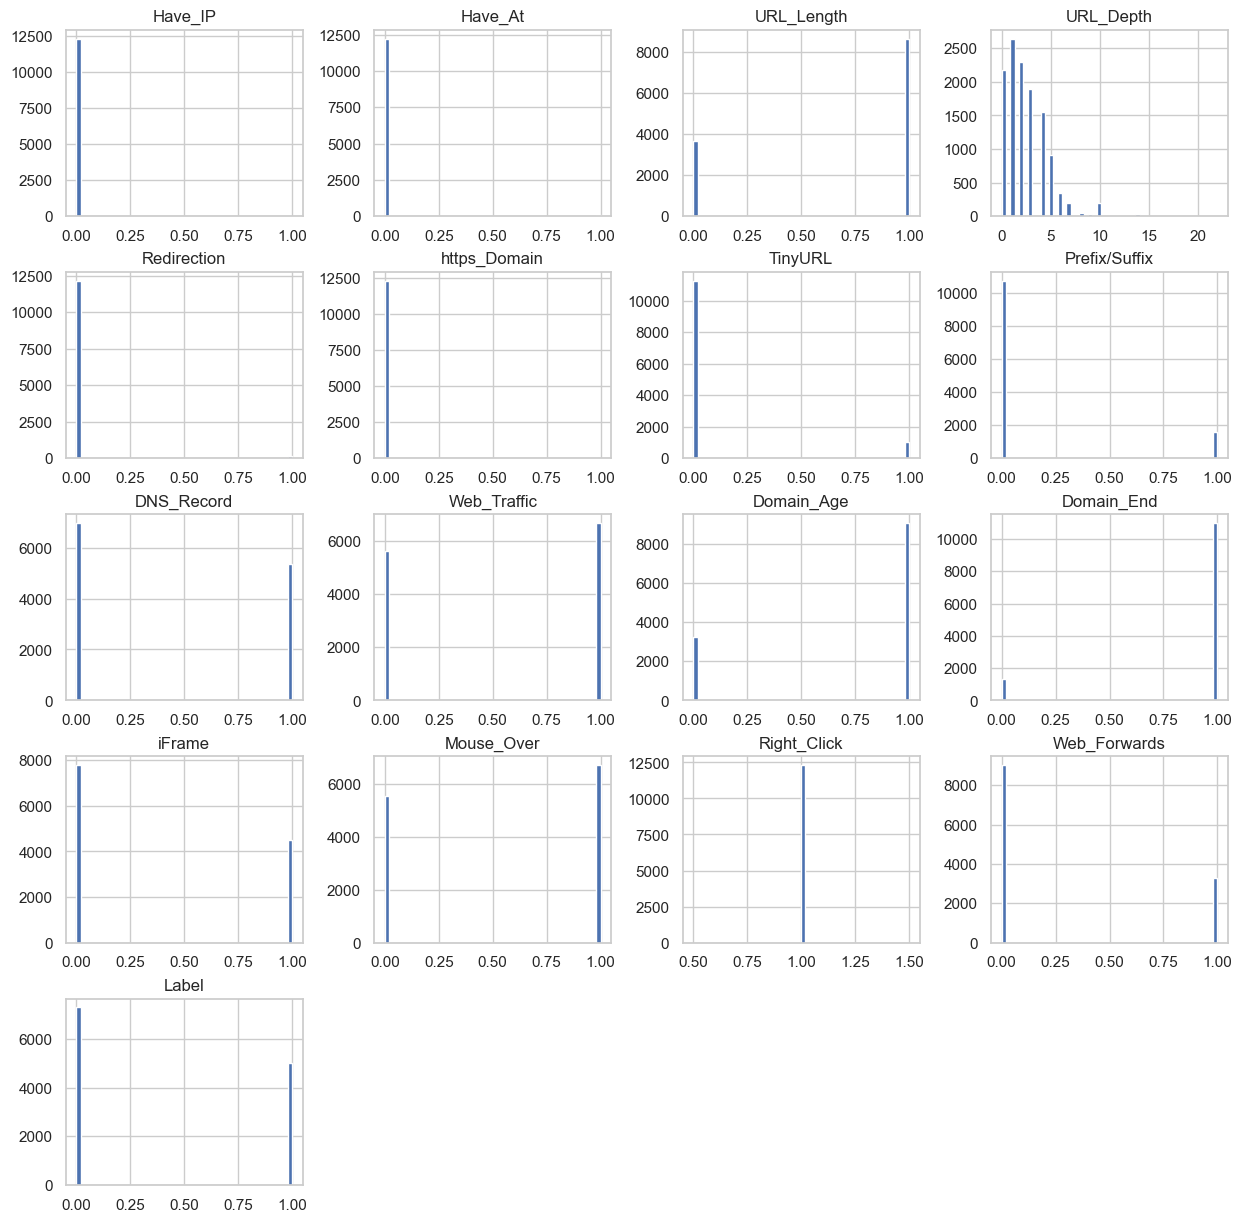

In [889]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [890]:
# print(data0.dtypes)
# Select only numeric columns for correlation
data0_numeric = data0.select_dtypes(include=[np.number])
# If you want to check for any remaining non-numeric columns
if data0_numeric.shape[1] == 0:
    print("No numeric columns available for correlation.")

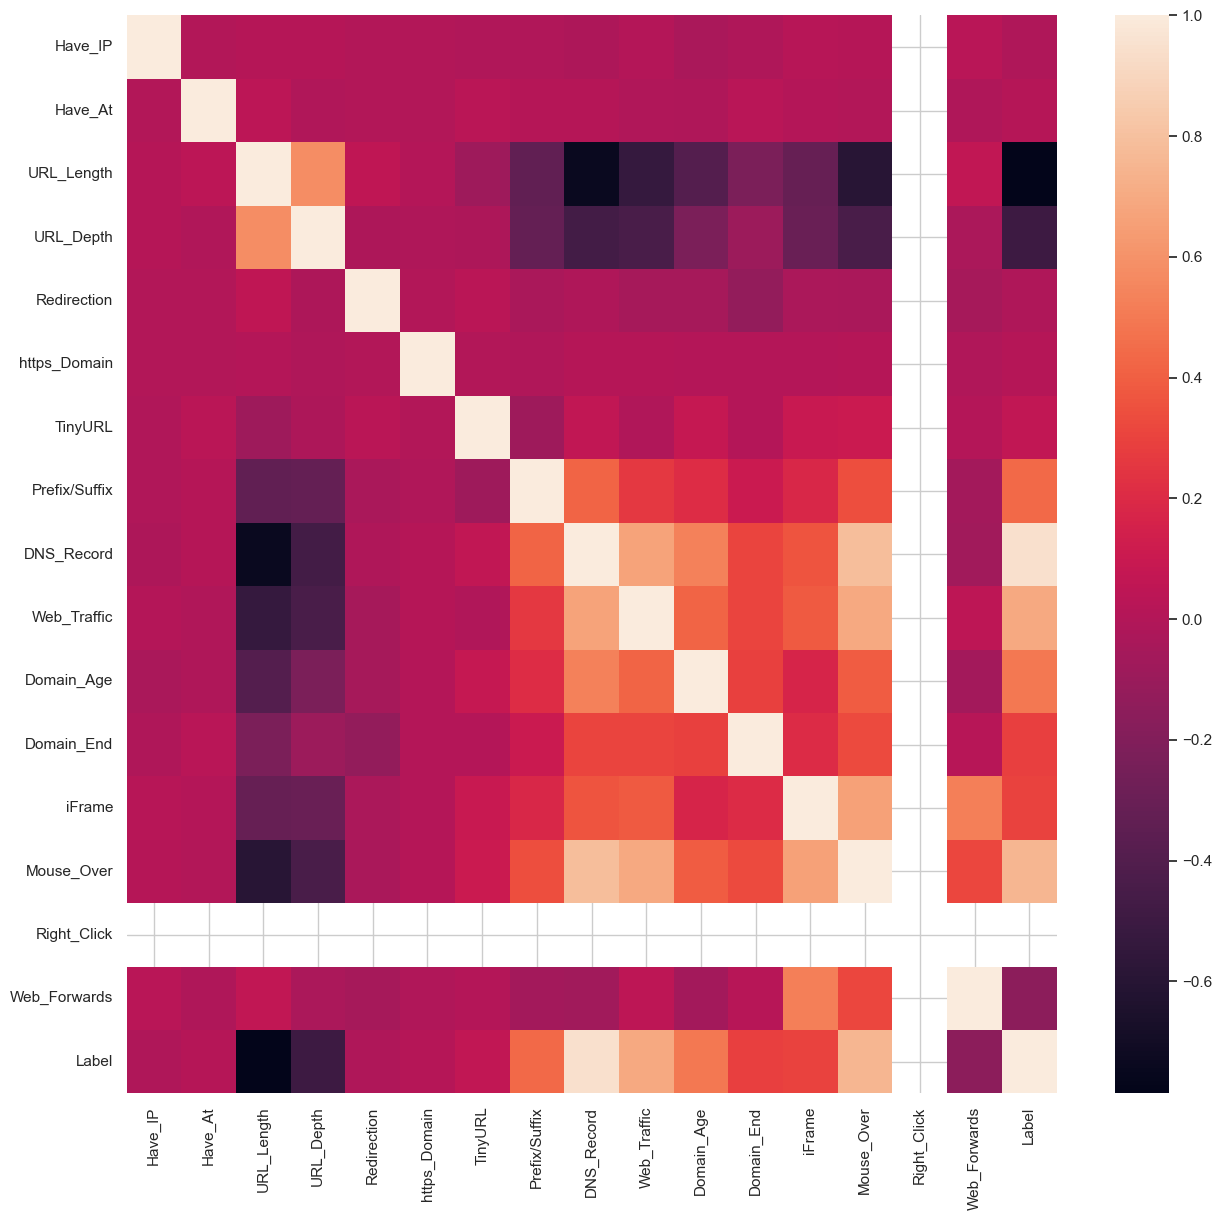

In [891]:
plt.figure(figsize=(15,14))
sns.heatmap(data0_numeric.corr())
plt.show()

In [892]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.0,12305.000000,12305.000000
mean,0.000488,0.006258,0.702885,2.450711,0.012434,0.000163,0.084518,0.127509,0.434214,0.542381,0.735230,0.892483,0.367412,0.546688,1.0,0.266965,0.406339
std,0.022077,0.078860,0.457006,2.135875,0.110817,0.012748,0.278175,0.333556,0.495673,0.498221,0.441229,0.309782,0.482119,0.497836,0.0,0.442392,0.491169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [893]:
data = data0.drop(['Domain','https_Domain','Right_Click'], axis = 1).copy()

In [894]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Web_Forwards,Label
0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,1
1,0,0,1,3,0,0,0,0,1,0,1,1,1,1,0
2,0,0,1,2,0,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1
4,0,0,0,1,0,1,0,1,1,1,1,1,1,0,1


In [895]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((12305, 14), (12305,))

In [896]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((9844, 14), (2461, 14))

In [897]:
# from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score


In [898]:
#Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [900]:
import time

#XGBoost Classification model
from xgboost import XGBClassifier

start_time = time.time()
#instantiate the model
xgb = XGBClassifier(learning_rate=0.2,max_depth=12)
# xgb = XGBClassifier(eval_metric='auc', colsample_bytree= 0.8, gamma = 0.1, learning_rate= 0.2, max_depth= 7, n_estimators= 200, subsample= 0.6)

#fit the model
xgb.fit(X_train, y_train)
train_time_baseline = time.time() - start_time

In [901]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [902]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.4f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.4f}".format(acc_test_xgb))
print(f"Training Time: {train_time_baseline:.2f} seconds")

XGBoost: Accuracy on training Data: 0.9972
XGBoost : Accuracy on test Data: 0.9984
Training Time: 0.12 seconds


In [903]:
scores = cross_val_score(xgb, X_train, y_train, cv=5)
print(f"Mean Accuracy: {scores.mean():.2f}")

Mean Accuracy: 1.00


In [904]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [905]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,XGBoost,0.997,0.998



Accuracy on Test Data: 0.9700

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1461
           1       0.97      0.97      0.97      1401

    accuracy                           0.97      2862
   macro avg       0.97      0.97      0.97      2862
weighted avg       0.97      0.97      0.97      2862



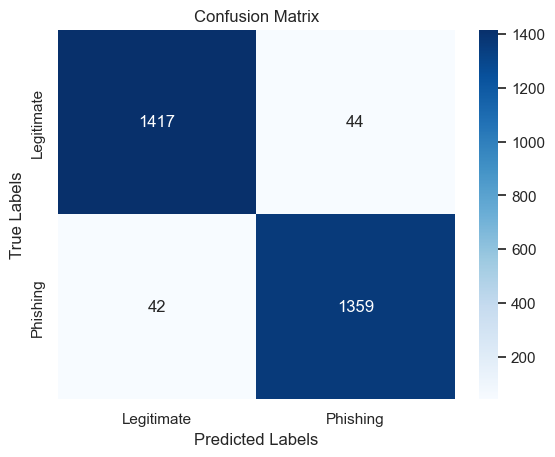

In [773]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data1 = pd.read_csv('urldata14k.csv')
#data1.head()
data1 = data1.drop(['Domain'], axis = 1).copy()
data1 = data1.sample(frac=1).reset_index(drop=True)
y = data1['Label']
X = data1.drop('Label',axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the XGBoost model
#xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
#{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
# Hyperparameters
params = {
    'colsample_bytree': 0.6,
    'gamma': 0,
    'learning_rate': 0.2,
    'max_depth': 7,
    'n_estimators': 200,
    #'reg_alpha': 0.08885184806583746,
    #'reg_lambda': 0.4671485658354062,
    'subsample': 1.0
}

# Create XGBoost classifier with the specified hyperparameters
xgb_model = XGBClassifier(**params, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Data: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
#Updated Script with Grid Search Hyperparameter Optimization python
from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, matthews_corrcoef

data2 = pd.read_csv('urldata14k.csv')
data2.head()
data2 = data2.drop(['Domain','https_Domain','Right_Click'], axis = 1).copy()
data2 = data2.sample(frac=1).reset_index(drop=True)
y = data2['Label']
X = data2.drop('Label',axis=1)

# Selected features
selected_features = ['DNS_Record', 'URL_Length', 'Mouse_Over', 'Web_Traffic', 'Domain_Age', 
                     'URL_Depth', 'Prefix/Suffix', 'iFrame', 'Domain_End', 'Web_Forwards', 
                     'TinyURL', 'Have_IP']

# Assuming 'data' contains your dataset with features and target variable
# Replace 'target' with the actual name of your target column
#X = data[selected_features]
#y = data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Define the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')

# Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2)

grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Predict on test and train data
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

# Evaluate the model
print("\nBest Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
print("\nAccuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nAccuracy on Train Data:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix and metrics
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

TPR = TP / (TP + FN)  # True Positive Rate (Recall)
TNR = TN / (TN + FP)  # True Negative Rate
FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Display additional metrics
print(f"\nTrue Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


In [776]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

data4 = pd.read_csv('urldata14k.csv')
data4 = data4.drop(['Domain','https_Domain','Right_Click'], axis = 1).copy()
data4 = data4.sample(frac=1).reset_index(drop=True)
y = data4['Label']
X = data4.drop('Label',axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Define the hyperparameter space
space = {
    'max_depth': hp.choice('max_depth', np.arange(3, 10, dtype=int)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'n_estimators': hp.choice('n_estimators', np.arange(50, 500, step=50, dtype=int)),
    'gamma': hp.uniform('gamma', 0, 5),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
}

# Objective function to minimize
def objective(params):
    model = XGBClassifier(
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        n_estimators=params['n_estimators'],
        gamma=params['gamma'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        eval_metric='logloss',
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Run the optimization
trials = Trials()
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,  # Number of iterations
    trials=trials,
    rstate=np.random.default_rng(42)  # For reproducibility
)

# Print the best parameters
print("\nBest Parameters:", best_params)

# Train the model with the best parameters
best_model = XGBClassifier(
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    gamma=best_params['gamma'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    eval_metric='logloss',
    random_state=42
)

best_model.fit(X_train, y_train)
final_predictions = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print("\nFinal Model Accuracy:", final_accuracy)

100%|██████████| 100/100 [00:08<00:00, 11.52trial/s, best loss: -0.9682040531097135]

Best Parameters: {'colsample_bytree': 0.8184220927963123, 'gamma': 1.8843999883799993, 'learning_rate': 0.2654315156646323, 'max_depth': 0, 'n_estimators': 8, 'reg_alpha': 0.4373959297185816, 'reg_lambda': 0.14340943099295042, 'subsample': 0.9397774340199195}

Final Model Accuracy: 0.9643605870020965


In [778]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, matthews_corrcoef
from xgboost import XGBClassifier
import pandas as pd

data1 = pd.read_csv('urldata14k.csv')
data1.head()
data = data1.drop(['Domain','https_Domain','Right_Click'], axis = 1).copy()
data = data.sample(frac=1).reset_index(drop=True)
y = data['Label']
X = data.drop('Label',axis=1)

# Assuming X and y are your features and target
selected_features = ['DNS_Record', 'URL_Length', 'Mouse_Over', 'Web_Traffic', 
                     'Domain_Age', 'URL_Depth', 'Prefix/Suffix', 'iFrame', 
                     'Domain_End', 'Web_Forwards', 'TinyURL', 'Have_IP']

X_selected = X[selected_features]  # Using the selected features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=12)

# Apply SMOTE to oversample the minority class in training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train XGBoost model
xgb_model = XGBClassifier( eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
print("\nAccuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Metrics
TPR = TP / (TP + FN)  # True Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Display additional metrics
print(f"\nTrue Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")



Accuracy on Test Data: 0.9730957372466806

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1446
           1       0.98      0.97      0.97      1416

    accuracy                           0.97      2862
   macro avg       0.97      0.97      0.97      2862
weighted avg       0.97      0.97      0.97      2862


True Positive Rate (TPR): 0.9682
True Negative Rate (TNR): 0.9779
False Positive Rate (FPR): 0.0221
False Negative Rate (FNR): 0.0318
Precision: 0.9772
F1-Score: 0.9727
Matthews Correlation Coefficient (MCC): 0.9462


Fold 1 Results:
Accuracy: 0.9675
Precision: 0.9770
Recall: 0.9576
F1-Score: 0.9672
MCC: 0.9352
----------------------------------------
Fold 2 Results:
Accuracy: 0.9709
Precision: 0.9725
Recall: 0.9692
F1-Score: 0.9709
MCC: 0.9418
----------------------------------------
Fold 3 Results:
Accuracy: 0.9692
Precision: 0.9731
Recall: 0.9651
F1-Score: 0.9691
MCC: 0.9384
----------------------------------------
Fold 4 Results:
Accuracy: 0.9726
Precision: 0.9720
Recall: 0.9733
F1-Score: 0.9726
MCC: 0.9452
----------------------------------------
Fold 5 Results:
Accuracy: 0.9682
Precision: 0.9730
Recall: 0.9630
F1-Score: 0.9680
MCC: 0.9364
----------------------------------------

Average Accuracy Across Folds: 0.9697

Metrics Summary Across Folds:
   Fold  Accuracy  Precision    Recall  F1-Score       MCC
0     1  0.967488   0.976955  0.957563  0.967162  0.935160
1     2  0.970910   0.972527  0.969199  0.970860  0.941826
2     3  0.969199   0.973085  0.965092  0.969072  0.938430
3     4  0.972

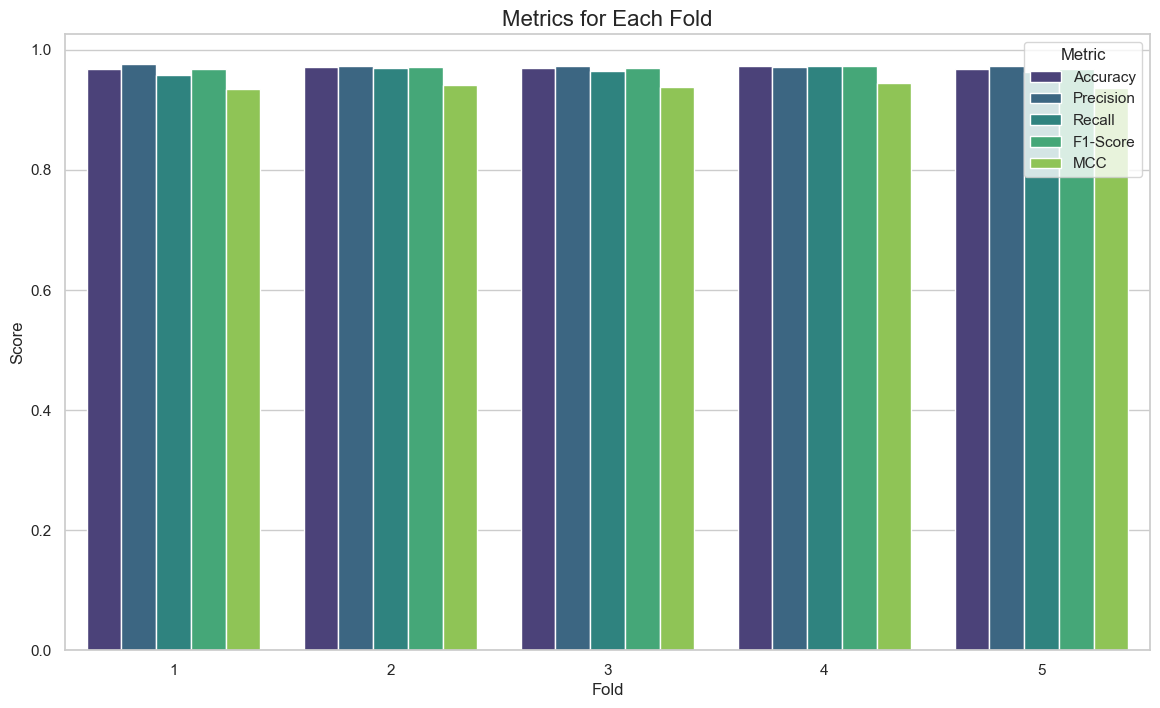

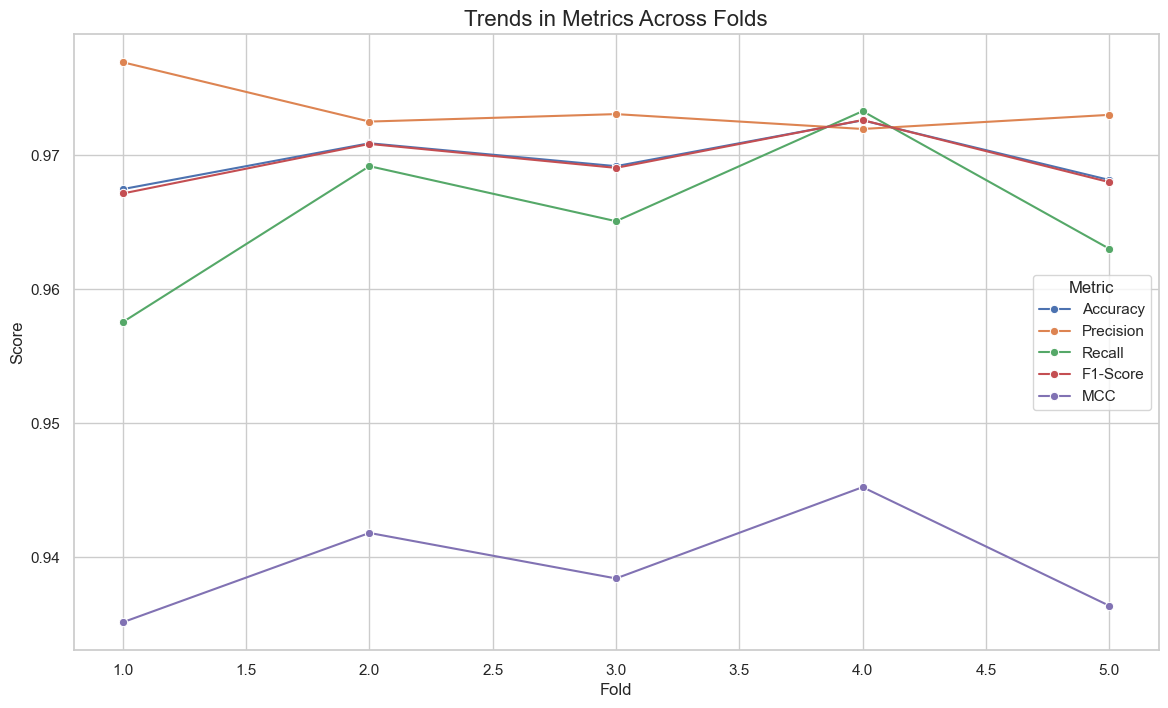

In [779]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

data1 = pd.read_csv('urldata14k.csv')
data1.head()
data = data1.drop(['Domain','https_Domain','Right_Click'], axis = 1).copy()
data = data.sample(frac=1).reset_index(drop=True)

y = data['Label']
X = data.drop('Label',axis=1)
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize the XGBoost model
xgb_model = XGBClassifier( eval_metric='logloss')

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_metrics = []

for fold, (train_index, test_index) in enumerate(skf.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model
    xgb_model.fit(X_train, y_train)

    # Predict
    y_pred = xgb_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Store results
    fold_accuracies.append(accuracy)
    fold_metrics.append({
        'Fold': fold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'MCC': mcc
    })

    # Print results for each fold
    print(f"Fold {fold} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print("-" * 40)

# Average Metrics Across Folds
avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f"\nAverage Accuracy Across Folds: {avg_accuracy:.4f}")

# Detailed Metrics for All Folds
import pandas as pd
metrics_df = pd.DataFrame(fold_metrics)
print("\nMetrics Summary Across Folds:")
print(metrics_df)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert fold_metrics to DataFrame if not already
metrics_df = pd.DataFrame(fold_metrics)

# Set style
sns.set(style="whitegrid")

# Bar Plot: Metrics for each fold
plt.figure(figsize=(14, 8))
metrics_melted = metrics_df.melt(id_vars="Fold", var_name="Metric", value_name="Score")
sns.barplot(data=metrics_melted, x="Fold", y="Score", hue="Metric", palette="viridis")
plt.title("Metrics for Each Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Metric")
plt.savefig('graphics/Metrics-for-each-fold.jpg')
plt.show()

# Line Plot: Trends across folds
plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_melted, x="Fold", y="Score", hue="Metric", marker="o", palette="deep")
plt.title("Trends in Metrics Across Folds", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Metric")
plt.savefig('graphics/Trends-across-folds.jpg')
plt.show()


In [780]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, matthews_corrcoef
from xgboost import XGBClassifier
import pandas as pd

data5 = pd.read_csv('urldata14k.csv')
data5.head()
data5 = data5.drop(['Domain','https_Domain','Right_Click'], axis = 1).copy()
data5 = data5.sample(frac=1).reset_index(drop=True)
y = data5['Label']
X = data5.drop('Label',axis=1)

# Assuming X and y are your features and target
selected_features = ['DNS_Record', 'URL_Length', 'Mouse_Over', 'Web_Traffic', 
                     'Domain_Age', 'URL_Depth', 'Prefix/Suffix', 'iFrame', 
                     'Domain_End', 'Web_Forwards', 'TinyURL', 'Have_IP']

X_selected = X[selected_features]  # Using the selected features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=12)

# Train XGBoost model
xgb_model = XGBClassifier( eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
print("\nAccuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Metrics
TPR = TP / (TP + FN)  # True Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Display additional metrics
print(f"\nTrue Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")



Accuracy on Test Data: 0.9619147449336128

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1441
           1       0.96      0.96      0.96      1421

    accuracy                           0.96      2862
   macro avg       0.96      0.96      0.96      2862
weighted avg       0.96      0.96      0.96      2862


True Positive Rate (TPR): 0.9585
True Negative Rate (TNR): 0.9653
False Positive Rate (FPR): 0.0347
False Negative Rate (FNR): 0.0415
Precision: 0.9646
F1-Score: 0.9615
Matthews Correlation Coefficient (MCC): 0.9238


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:20:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9644
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1456
           1       0.97      0.96      0.96      1406

    accuracy                           0.96      2862
   macro avg       0.96      0.96      0.96      2862
weighted avg       0.96      0.96      0.96      2862

--------------------------------------------------
[LightGBM] [Info] Number of positive: 5599, number of negative: 5849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 11448, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489081 -> initscore=-0.043683
[LightGBM] [Info] Start training from score -0.043683
LightGBM Ac

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CatBoost Accuracy: 0.9644
CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1456
           1       0.98      0.95      0.96      1406

    accuracy                           0.96      2862
   macro avg       0.96      0.96      0.96      2862
weighted avg       0.96      0.96      0.96      2862

--------------------------------------------------
[LightGBM] [Info] Number of positive: 5599, number of negative: 5849
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 11448, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489081 -> initscore=-0.043683
[LightGBM] [Info] Start training from score -0.043683


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:20:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ensemble Model Accuracy: 0.9644

Ensemble Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1456
           1       0.98      0.95      0.96      1406

    accuracy                           0.96      2862
   macro avg       0.96      0.96      0.96      2862
weighted avg       0.96      0.96      0.96      2862



/var/folders/ps/xrms60ss59758wkh7b7k1zpr0000gp/T/ipykernel_52773/808036972.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette="viridis")


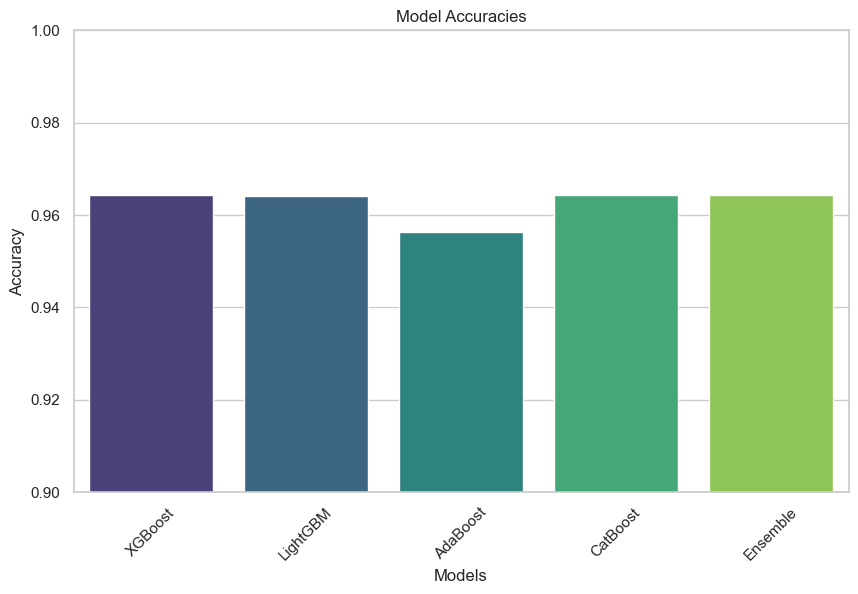

In [781]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data6 = pd.read_csv('urldata14k.csv')

# Drop unnecessary columns and shuffle data
data6 = data6.drop(['Domain'], axis=1).copy()
data6 = data6.sample(frac=1).reset_index(drop=True)

# Separate features and labels
y = data6['Label']
X = data6.drop('Label', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)
lgbm_model = LGBMClassifier(random_state=42)
adaboost_model = AdaBoostClassifier(random_state=42)
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

# Train and evaluate individual models
models = {
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model,
    "AdaBoost": adaboost_model,
    "CatBoost": catboost_model
}

individual_accuracies = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    individual_accuracies[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

# Combine models into a voting classifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('adaboost', adaboost_model),
        ('catboost', catboost_model)
    ],
    voting='hard'  # Change to 'soft' if required
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict and evaluate ensemble model
y_pred_ensemble = voting_clf.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")
print("\nEnsemble Model Classification Report:\n", classification_report(y_test, y_pred_ensemble))

# Combine individual and ensemble results into a DataFrame
results_df = pd.DataFrame.from_dict(individual_accuracies, orient='index', columns=['Accuracy'])
results_df.loc['Ensemble'] = ensemble_accuracy

# Plot individual and ensemble accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette="viridis")
plt.title("Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0.9, 1.0)  # Adjust range if needed
plt.xticks(rotation=45)
plt.show()

Accuracy Train Data: 0.9980
Accuracy Test Data: 0.9973

True Positive Rate (TPR): 0.9949
True Negative Rate (TNR): 1.0000
False Positive Rate (FPR): 0.0000
False Negative Rate (FNR): 0.0051
Precision: 1.0000
Recall: 0.9949
F1-Score: 0.9974
Matthews Correlation Coefficient (MCC): 0.9958

Feature Importance:
          Feature  Importance
8      DNS_Record    0.912129
2      URL_Length    0.040241
9     Web_Traffic    0.027920
13     Mouse_Over    0.007963
7   Prefix/Suffix    0.004955
14   Web_Forwards    0.003938
1         Have_At    0.001965
12         iFrame    0.000795
3       URL_Depth    0.000093
0         Have_IP    0.000000
4     Redirection    0.000000
5    https_Domain    0.000000
6         TinyURL    0.000000
10     Domain_Age    0.000000
11     Domain_End    0.000000


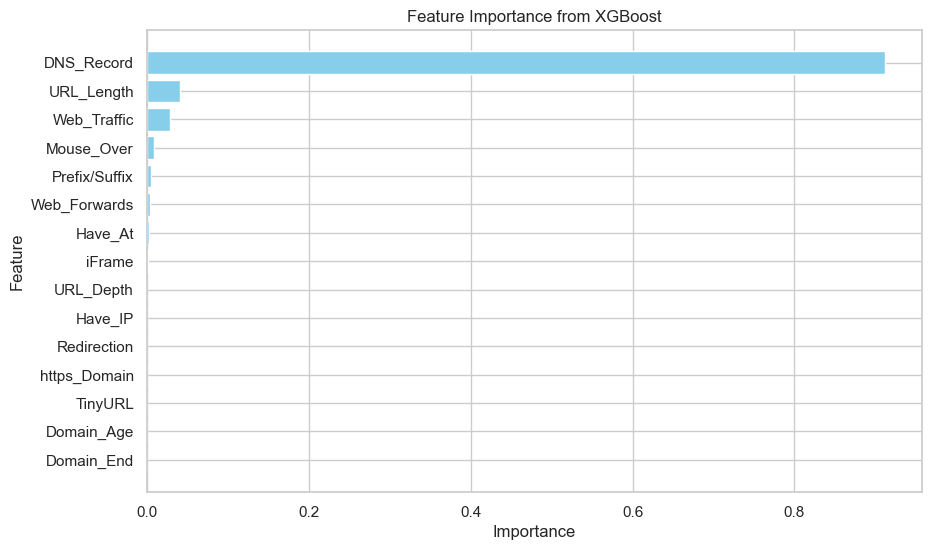

In [908]:
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
# Gantilah 'urldata13k.csv' dengan nama file dataset Anda
data10 = pd.read_csv('urldata13k.csv')

# Drop fitur yang tidak relevan (sesuaikan dengan dataset Anda)
data10 = data10.drop(['Domain', 'Right_Click'], axis=1)

# Define features (X) and target (y)
y = data10['Label']
X = data10.drop('Label', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)

accuracy_test = accuracy_score(y_train,y_pred_train)
accuracy_train = accuracy_score(y_test, y_pred_test)

# y_test_xgb = xgb.predict(X_test)
# y_train_xgb = xgb.predict(X_train)

# acc_train_xgb = accuracy_score(y_train,y_train_xgb)
# acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print(f"Accuracy Train Data: {accuracy_train:.4f}")
print(f"Accuracy Test Data: {accuracy_test:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Metrics
TPR = TP / (TP + FN)  # True Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Display additional metrics
print(f"\nTrue Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Extract feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()  # Membuat grafik dari bawah ke atas
plt.show()


Pearson Correlation Matrix:
                Have_IP   Have_At  URL_Length  URL_Depth  Redirection  \
Have_IP        1.000000 -0.001753    0.014360   0.016022    -0.002478   
Have_At       -0.001753  1.000000    0.042572  -0.006613     0.000396   
URL_Length     0.014360  0.042572    1.000000   0.579332     0.052090   
URL_Depth      0.016022 -0.006613    0.579332   1.000000    -0.019902   
Redirection   -0.002478  0.000396    0.052090  -0.019902     1.000000   
https_Domain  -0.000282 -0.001012    0.008290  -0.014630    -0.001431   
TinyURL       -0.006711  0.031462   -0.085668  -0.019662     0.037092   
Prefix/Suffix -0.008444  0.009831   -0.338468  -0.324462    -0.038498   
DNS_Record    -0.019349  0.015730   -0.742155  -0.470141    -0.016919   
Web_Traffic    0.005510 -0.007785   -0.533306  -0.440998    -0.047083   
Domain_Age    -0.036806 -0.017781   -0.390161  -0.226864    -0.052343   
Domain_End    -0.016101  0.024216   -0.225662  -0.092705    -0.124412   
iFrame         0.021346

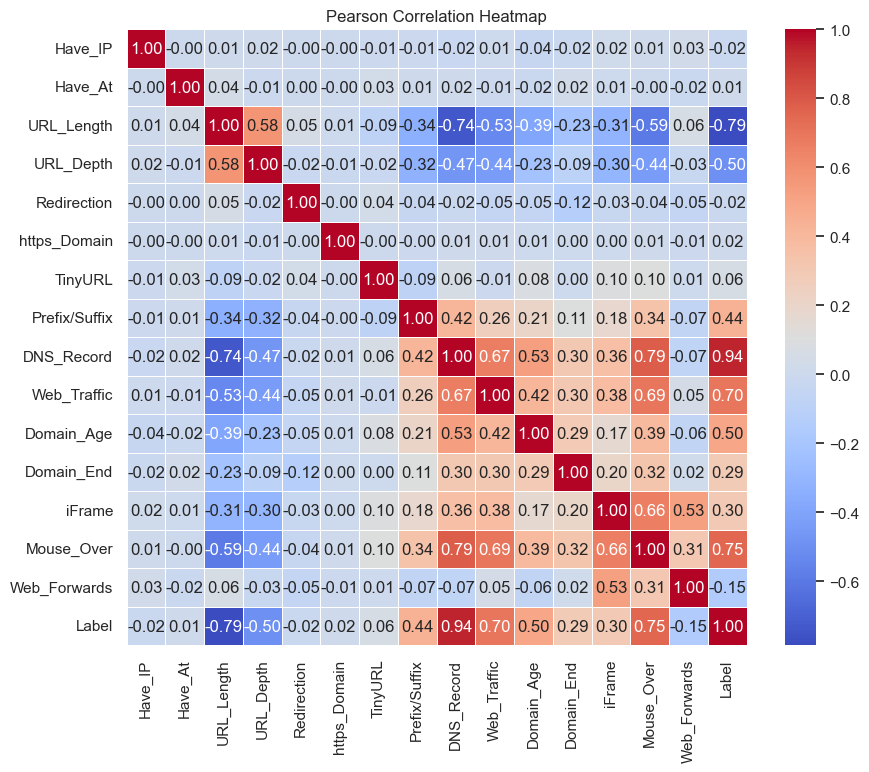

In [816]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
# Gantilah 'urldata13k.csv' dengan nama file dataset Anda
data = pd.read_csv('urldata13k.csv')

# Drop kolom yang tidak relevan atau non-numerik
data = data.drop(['Domain', 'Right_Click'], axis=1)

# Hitung Pearson correlation
correlation_matrix = data.corr(method='pearson')

# Tampilkan hasil dalam bentuk tabel
print("Pearson Correlation Matrix:")
print(correlation_matrix)

# Visualisasi Pearson Correlation menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.savefig('graphics/Pearson_Correlation_Heatmap.jpg')
plt.show()
